<center>
    <img style="float: left;" src="Mix_colour.png" width="200"></img>
</center>

<br/><br/>
<br/><br/>

# Measuring Model Performance for Classification

In this notebook you will continue to learn more about supervised learning and measuring model performance, focusing on classification.

## Data 

This assignment uses the breast cancer Wisconsin (diagnostic) database to create a classifier that can help to diagnose patients. The dataset describes various attributes of the tumors and a class it belongs to: malignant or benign. Thus, our target is the class - we want to build a classifier for malignant and benign tumors.

Let's get started from importing some useful packages and loading the dataset `breast_cancer.csv`.

In [1]:
import pandas as pd
import numpy as np

df_breast_cancer = pd.read_csv('/home/jovyan/Data/breast_cancer.csv')

Let's get more familiar with the dataset.

In [2]:
df_breast_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


To understand better the meaning of the variables we provide also a description of important attributes. 
* radius - mean of distances from center to points on the perimeter
* texture - standard deviation of gray-scale values
* perimeter
* area
* smoothness - local variation in radius lengths
* compactness - $\text{perimeter}^2/\text{area} - 1.0$
* concavity - severity of concave portions of the contour
* concave points - number of concave portions of the contour
* symmetry 
* fractal dimension - ("coastline approximation" - 1)

**Note:** the target is the type of the tumor - malignant (label 0) or benign (label 1).

In the dataset these attributes are resulting in 30 features using their mean, standard error, and "worst" or largest (mean of the three largest values). Let's list the columns of the dataset. Note that here names of the columns are self-explanatory.

In [3]:
print('Number of features (excl the target) ', df_breast_cancer.shape[1]-1)
df_breast_cancer.columns

Number of features (excl the target)  30


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

## Data exploration

Let's check if there are any missing values in the dataset.

In [4]:
df_breast_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no missing values, so let's now take a look to the summary of descriptive statistic of the data/

In [5]:
pd.set_option('display.max_columns', 500) #we want to be able to see all columns
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Let's check the distribution of the data by classes.

**Note:** here label 0 means malign and 1 - benign tumors. 

In [6]:
df_breast_cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Let's take a look at the correlation between features and the target. We will use a heatmap of the correlation matrix for this purpose.

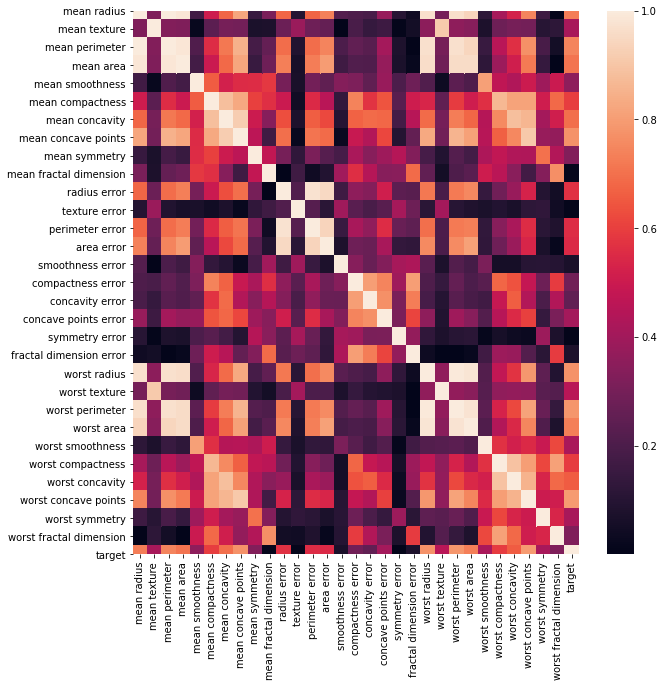

In [7]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(abs(df_breast_cancer.dropna().corr()),ax=ax)

From the above correlation matrix we can see that the target is a little bit more correlated to some features than the others. 

Let us plot pairwise relationships between "worst concave points", "worst radius" and "mean concave points". Plots on diagonal represent distribution of the data for the variable of that column for each class.

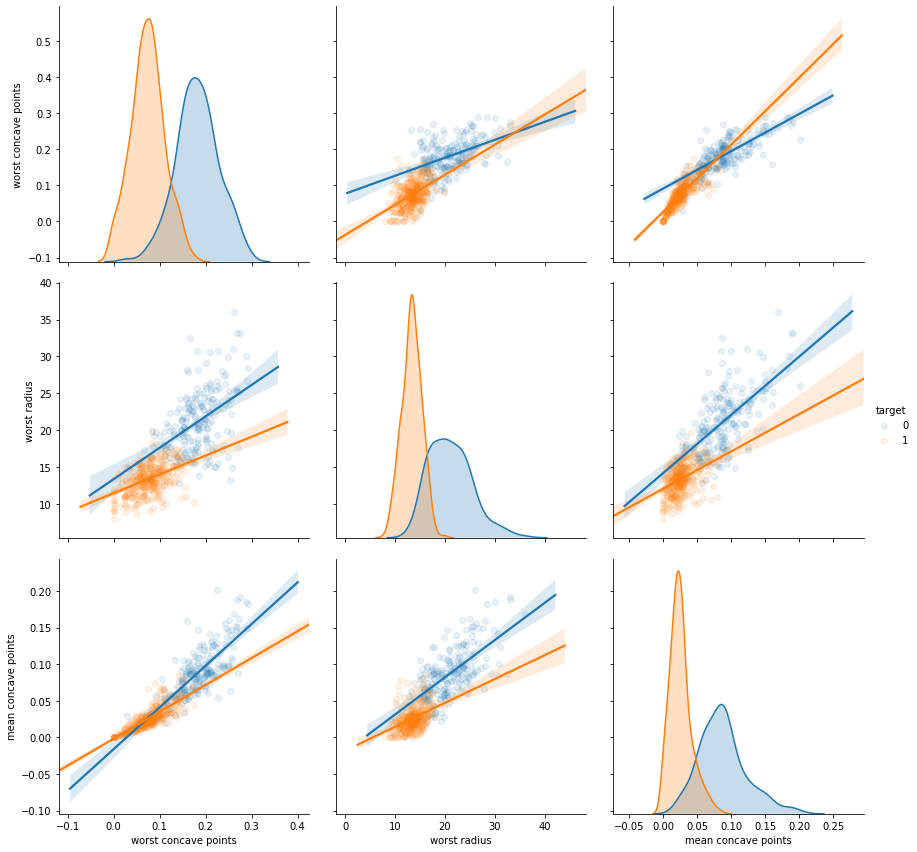

In [8]:
sns.pairplot(data=df_breast_cancer, vars=['worst concave points','worst radius','mean concave points'],
             hue='target', kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.1}}, height=4);

**Note:** just looking at the distribution we do see some separation between malign (0) and benign (1). This is good for a future linear classifier. 

**Sidenote** Keep in mind that the features we selected above have a strong linear correlation with the target variable. It is useful for models such as linear regression or logistic regression (i.e. those that uses purely linear features). There might be other features above that would be great classifiers but that don't have a high correlation coefficient with the target variable. Below is a simple example of how we could get fooled by only looking at the correlation plot. 

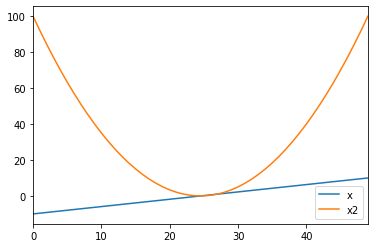

In [9]:
x1 = np.linspace(-10, 10, num=50)
x2 = np.power(x1,2)

df_test = pd.DataFrame({'x':x1, 'x2':x2})

df_test.plot.line()

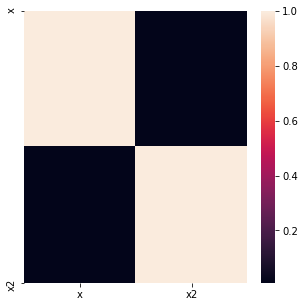

In [10]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(abs(df_test.corr(method='spearman')), ax=ax)

**Note:** we see that x2 and x1 has a low correlation coefficient. However, we know that x1 to the power of 2 would be a perfect predictor to x2. Thus there is a non-linear relationship that would be needed to be explored for x1 to be a good predictor of x2. 

## Logistic regression classifier

In this assignment we want to predict the class of the tumor using logistic regression model and evaluate the performance of the model.

### Q1:

Let's prepare the data for the further modelling. Split the dataset into train and test sets using features discussed above ('worst concave points','worst radius','mean concave points').
Use __`test_size`=0.3__  and __`random_state`=1236.__ You need to use these values for the assignment to get graded as correct.

**Hint:** 

* import the necessary module from scikit-learn
* select the features: 'worst concave points','worst radius','mean concave points' and the target variable
* create the variables `X_train`, `y_train`, `X_test` and `y_test` for the training and testing the future model

In [12]:
# (approx. 4 lines of code)
### START ANSWER HERE ###
from sklearn.model_selection import train_test_split

X = df_breast_cancer[['worst concave points', 'worst radius', 'mean concave points']]
y = df_breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1236)
### END ANSWER HERE ###

In [13]:
print('X_train first 2 values ', X_train.iloc[:2, :].values)
print('X_train.shape = ', X_train.shape, '\t y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, '\t y_test.shape = ', y_test.shape)

X_train first 2 values  [[ 0.1252  17.77     0.04079]
 [ 0.1342  13.78     0.04846]]
X_train.shape =  (398, 3) 	 y_train.shape =  (398,)
X_test.shape =  (171, 3) 	 y_test.shape =  (171,)


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> X_train.iloc[:2, :].values</td> 
        <td> [[ 0.1252  17.77     0.04079]
 [ 0.1342  13.78     0.04846]] 
        </td> 
    </tr>
    <tr> 
        <td> X_train.shape</td> 
        <td> (398, 3) </td> 
    </tr>
    <tr> 
        <td> y_train.shape</td> 
        <td> (398, ) </td> 
    </tr>
    <tr> 
        <td> X_test.shape</td> 
        <td> (171, 3) </td> 
    </tr>
    <tr> 
        <td> y_test.shape</td> 
        <td> (171, ) </td> 
    </tr>
</table> 


In [14]:
# nbgrader cell


### Q2:

Implement a logistic regression using scikit-learn using`solver='liblinear'` and `random_state=10`.

**Hint:**
* import the necessary module
* create a logistic regression model with `solver='liblinear'`, `random_state=10`. Use `logistic_regression = `.
* fit the model using training data

In [15]:
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=10, solver='liblinear')
logistic_regression.fit(X_train, y_train)

### END ANSWER HERE ###

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print('Logistic regression coefficients ', logistic_regression.coef_)
print('Logistic regression intercept ', logistic_regression.intercept_)

Logistic regression coefficients  [[-2.05174469 -0.41767626 -1.20553354]]
Logistic regression intercept  [7.55033461]


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Logistic regression coefficients</td> 
        <td> [[-2.05174469 -0.41767626 -1.20553354]]</td> 
    </tr>
    <tr> 
        <td> Logistic regression intercept</td> 
        <td> [7.55033461] </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


## Model performance evaluation

Recall from the corresponding section, that performance of a classification model can be characterized using various measures such as:
* accuracy
* the receiver operation characteristic curve (ROC) and an area under it (AUC)
* precision, recall and F1-score

Further in the assignment you estimate all these measures for the classifier implemented above.

## Accuracy score

### Q3:

Use the function provided in scikit-learn to measure the accuracy of the logistic regression model for train and test sets. 

**Hint** [Here you can find more information about sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Use `accuracy_train = ` and `accuracy_test = `.

In [19]:
# (approx. 3 lines of code)
### START ANSWER HERE ###
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, logistic_regression.predict(X_train))
accuracy_test = accuracy_score(y_test, logistic_regression.predict(X_test))
### END ANSWER HERE ###

In [20]:
print('Accuracy train/test: %f/%f' %(accuracy_train, accuracy_test))

Accuracy train/test: 0.919598/0.918129


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> Accuracy train/test</td> 
        <td> 0.919598/0.918129</td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


### Q4 (multiple answers):

Based on what you have read about classification models evaluation, think whether accuracy is a good score for our case. What can be the dangers with accuracy? 
1. Accuracy only uses the majority class for the calculation of the score. 
2. If we have more data that is benign then malign, our logistic regression classifier will get better at classifying benign data then malign. Thus accuracy will reflect this, which is miss-leading. 
3. A 50/50 class balance is most important if one uses accuracy as a measure. 

In [21]:
# Fill in all the numbers corresponding to your answer inside the brackets: Q4_answer = [5,6]
### START ANSWER HERE ###
Q4_answer = [2, 3]
### END ANSWER HERE ###

In [22]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(set(Q4_answer))=='5ad06bc3b78920bcf496ed9a814cf4db':
    print('Correct!')
else:
    print('Not correct! Please try again!')

Correct!


In [23]:
# nbgrader cell


### ROC (The Receiver Operating Characteristic curve)

In the reading material we discussed another classical way to measure binary classifier performance - the receiver operating characteristic curve (ROC) and corresponding area under the curve (AUC). Take a look to the ROC plots below.

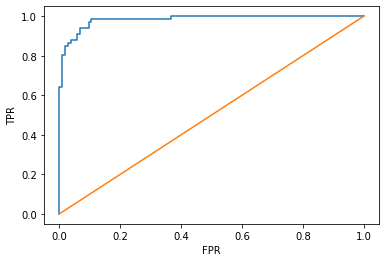

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,0], pos_label=0)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Above, we refer to positive (P) being malign cancer, while benign is considered negative (N). Thus, TPR measures the proportion of actual positives that are correctly identified as such (the percentage of sick people who are correctly identified as having 'bad' cancer). For our model, it is more important to identify all the sick people who need treatment, then to let some through who don't have malign cancer.

### Q5:

Since in the case of the cancer diagnostic false negative prediction can cost people's lives, we want to avoid predicting the binign class for actual malign cancer. Looking at the plot above, what would be the lowest false positive rate, if we aim not to have any false negative predictions?

`Q5_answer = your answer` (for example `Q5_answer = 0.9`).

In [25]:
### START ANSWER HERE ###
Q5_answer = 0.4
### END ANSWER HERE ###

In [26]:
import hashlib
_myhash = lambda x: hashlib.md5(str(x).encode()).hexdigest()
if _myhash(Q5_answer)=='54fbf38cf649866815e0fefc46a1f6c7':
    print('Correct!')
else:
    print('Try again!')

Correct!


In [ ]:
# nbgrader cell


### Q6:

What is the AUC of the above ROC curve? 

**Hint:** 
* import the necessary module
* use `auc = roc_auc_score()` with correct input to compute AUC of the curve above

In [28]:
# (approx. 2 lines of code)
### START ANSWER HERE ###
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])
### END ANSWER HERE ###

In [29]:
print('AUC = ', auc)

AUC =  0.9829219288174513


**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> AUC</td> 
        <td> 0.9829219288174513 </td> 
    </tr>
</table> 

In [ ]:
# nbgrader cell


## Precision, recall and F1-score

### Q7:

Get the precision, recall and F1-score for the model on test set, i.e. import the classification report.

Use `report = classification_report()` with correct inputs using the part of the data relevant for evaluation. Choose default options for other input parameters.

In [30]:
# (approx. 2 lines of code)
### START ANSWER HERE ###
from sklearn.metrics import classification_report
report = classification_report(y_test, logistic_regression.predict(X_test))
### END ANSWER HERE ###

In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        67
           1       0.89      0.98      0.94       104

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



Check your understanding of the classification report: what is the precision of malign tumor, recall for malign and F1-score for malign tumor? Compare with the output below.

**Expected Output**: 
<table style="width:100%">
    <tr> 
        <td> malign presicision</td> 
        <td> 0.96 </td> 
    </tr>
    <tr> 
        <td> malign recall</td> 
        <td> 0.82 </td> 
    </tr>
    <tr> 
        <td> malign f1-score</td> 
        <td> 0.89 </td> 
    </tr>
</table> 

In [32]:
# nbgrader cell


### Choosing a different threshold

Note that for the present logistic regression model, the default is to use a probability of 0.5 or higher to predict label 0 (malign). Based on the ROC curve in the cell below, let's choose a threshold that is more appropriate. 

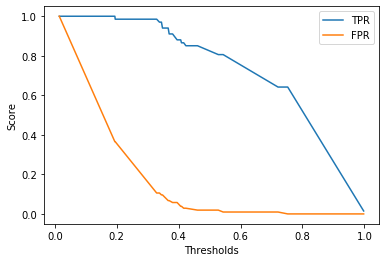

In [33]:
plt.plot(thresholds[1:],tpr[1:])
plt.plot(thresholds[1:],fpr[1:])
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.gca().legend(('TPR','FPR'))
plt.show()

Let's choose threshold 0.2 and see new classification report.

In [34]:
from sklearn.metrics import classification_report

THRESHOLD = 0.2
prediction_modify_threshold = np.where(logistic_regression.predict_proba(X_test)[:,0]<THRESHOLD,1,0)

print(classification_report(y_test, prediction_modify_threshold))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78        67
           1       0.99      0.65      0.79       104

    accuracy                           0.78       171
   macro avg       0.82      0.82      0.78       171
weighted avg       0.85      0.78      0.78       171



Now our classifier finds almost all cases of malign cancer. It does however, predict that some benign cancers are malign. This, however seems less important as we can always do another test for this case. This example demonstrates the importance of understanding which score should be used to measure success for the model. 

# Good job! 